# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [6]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')
base.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [30]:
base['weight'] = base['weight'].str.replace(',','.')
base['weight'] = base['weight'].astype('Float64')

In [31]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.30371,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.0,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.0,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# tratando outliers em height

base['height'] = base['height'].apply(lambda x: x if x > 140 and x <210 else np.mean(base['height']))

In [40]:
# tratando outliers em weight

base['weight'] = base['weight'].apply(lambda x: x if x > 45 and x <210 else np.mean(base['weight']))

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


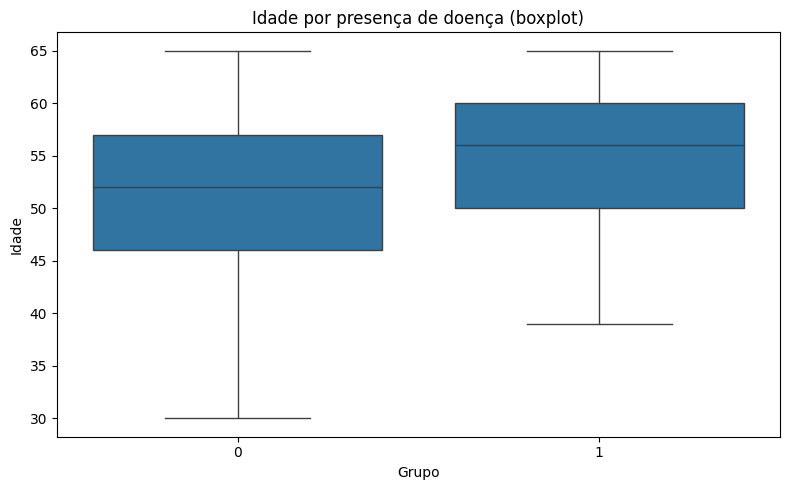

In [11]:
# cardio_disease x age
plt.figure(figsize=(8,5))
sns.boxplot(data=base, x="cardio_disease", y="age")
plt.xlabel("Grupo")
plt.ylabel("Idade")
plt.title("Idade por presença de doença (boxplot)")
plt.tight_layout()
plt.show()


O boxplot mostra que pacientes com doença cardíaca (grupo 1) tendem a ser mais velhos do que os sem a doença (grupo 0). A mediana da idade é maior no grupo doente, e a dispersão também é mais concentrada em idades mais elevadas. Isso sugere que a idade é um fator relevante na presença de doenças cardíacas, como ja era de se imaginar.

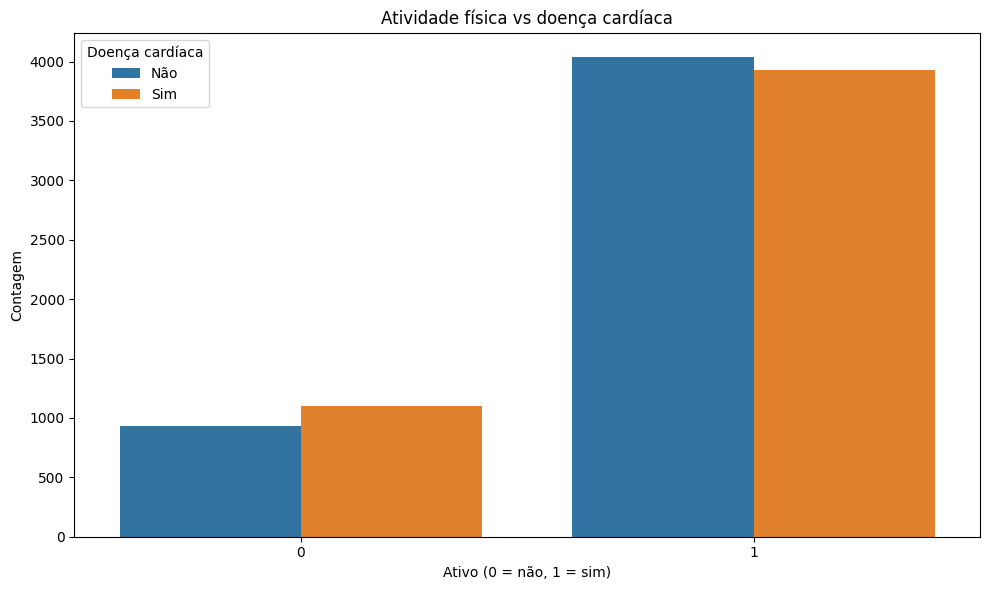

In [16]:
# cardio disease x active
plt.figure(figsize=(10,6))
sns.countplot(data=base, x="active", hue="cardio_disease")
plt.xlabel("Ativo (0 = não, 1 = sim)")
plt.ylabel("Contagem")
plt.title("Atividade física vs doença cardíaca")
plt.legend(title="Doença cardíaca", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()


O gráfico de barras indica que tanto pessoas ativas quanto inativas podem apresentar doença cardíaca. Entretanto, mesmo entre os indivíduos ativos (active = 1), há uma proporção considerável de casos com a doença. Isso mostra que a prática de atividade física, apesar de importante, não é um fator isolado de proteção e deve ser analisada em conjunto com outras variáveis, como alimentação e histórico clínico.

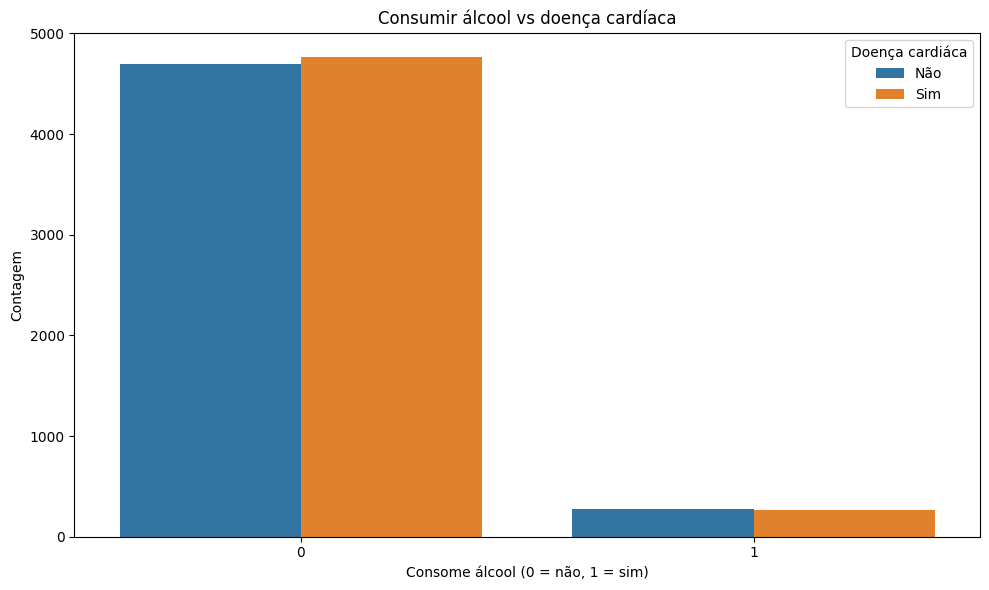

In [20]:
# cardio disease x álcool
plt.figure(figsize=(10,6))
sns.countplot(data=base, x="alco", hue="cardio_disease")
plt.xlabel("Consome álcool (0 = não, 1 = sim)")
plt.ylabel("Contagem")
plt.title("Consumir álcool vs doença cardíaca")
plt.legend(title="Doença cardiáca", labels=["Não", "Sim"])
plt.tight_layout()
plt.show()


O gráfico de barras indica que tanto pessoas ativas quanto inativas podem apresentar doença cardíaca. Entretanto, mesmo entre os indivíduos ativos (active = 1), há uma proporção considerável de casos com a doença. Isso mostra que a prática de atividade física, apesar de importante, não é um fator isolado de proteção e deve ser analisada em conjunto com outras variáveis, como alimentação e histórico clínico.

A partir das análises realizadas, observa-se que a idade apresenta uma relação mais clara com a presença de doenças cardíacas, enquanto variáveis como atividade física e consumo de álcool, quando analisadas de forma isolada, não evidenciam associação direta. Isso leva ao entendimento de que o risco cardiovascular não pode ser explicado por um único atributo, mas sim por um conjunto de fatores que interagem entre si.

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



In [41]:
base.corr()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
age,1.000000,-0.016550,-0.089976,0.045084,0.172934,0.091026,-0.049640,-0.043592,-0.022665,0.237076
gender,-0.016550,1.000000,0.524508,0.144629,-0.032808,-0.025837,0.332060,0.179608,0.011753,0.002226
height,-0.089976,0.524508,1.000000,0.296014,-0.054023,-0.029513,0.203742,0.115104,-0.007934,-0.013753
weight,0.045084,0.144629,0.296014,1.000000,0.130723,0.099633,0.064387,0.078474,-0.016605,0.180716
cholesterol,0.172934,-0.032808,-0.054023,0.130723,1.000000,0.431599,0.024436,0.019636,0.018799,0.221273
gluc,0.091026,-0.025837,-0.029513,0.099633,0.431599,1.000000,0.017538,0.013867,0.004671,0.082441
smoke,-0.049640,0.332060,0.203742,0.064387,0.024436,0.017538,1.000000,0.329043,0.031873,-0.018093
alco,-0.043592,0.179608,0.115104,0.078474,0.019636,0.013867,0.329043,1.000000,0.037405,-0.006357
active,-0.022665,0.011753,-0.007934,-0.016605,0.018799,0.004671,0.031873,0.037405,1.000000,-0.039153
cardio_disease,0.237076,0.002226,-0.013753,0.180716,0.221273,0.082441,-0.018093,-0.006357,-0.039153,1.000000


<Axes: >

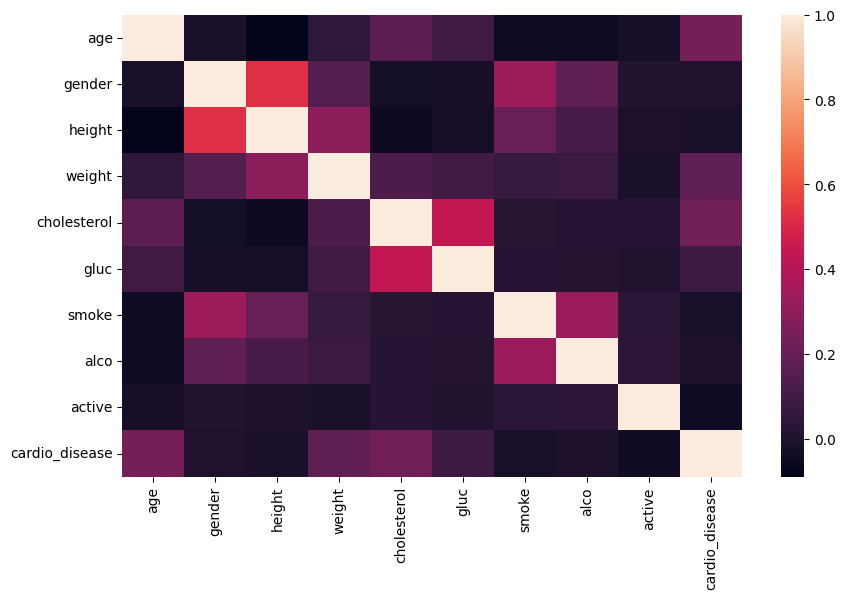

In [ ]:
# plotando a matriz de coorrelação
plt.figure(figsize=(10,6))
sns.heatmap(data=base.corr())

Algumas variáveis apresentam correlações interessantes entre sí, como gender e height, glicose e colesterol e smoke com alcool e gender. Entretanto a correlação mais forte com a variável target é de age com cardio_disease, que é apenas de 0,2, essa fraca correlação demonstra que doenças cardíacas são multifatoriais e podem estar relacionadas com outros fatores não encontrados no dataset.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [45]:
# separando a base em treino e teste
X = base.drop('cardio_disease', axis=1)
y = base['cardio_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [46]:
# Padronizando os dados de treino e teste
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# dados depois da padronização
print(f'Treino: {X_train[:5]} \n\n Teste: {X_test[:5]}')

Treino: [[-0.04193779 -0.72208614  0.4528924   0.31946494 -0.54463709 -0.39443059
  -0.31338712 -0.23958675  0.50490601]
 [ 1.57671368 -0.72208614 -0.18893217 -0.37863235  2.40390091  3.14760161
  -0.31338712 -0.23958675  0.50490601]
 [ 0.69381288 -0.72208614  1.09471698  0.38927467  0.92963191  1.37658551
   3.19094165 -0.23958675  0.50490601]
 [ 1.28241341  1.38487633 -0.31729709 -0.5182518  -0.54463709 -0.39443059
   3.19094165 -0.23958675  0.50490601]
 [-0.18908792  1.38487633  1.73654156 -0.5182518  -0.54463709 -0.39443059
  -0.31338712 -0.23958675  0.50490601]] 

 Teste: [[ 0.54666274  1.38487633  0.96635207 -0.16920316  2.40390091 -0.39443059
  -0.31338712 -0.23958675  0.50490601]
 [-1.66058925 -0.72208614  0.4528924  -1.14653936 -0.54463709 -0.39443059
  -0.31338712 -0.23958675  0.50490601]
 [ 0.10521235  1.38487633  0.70962224  1.01756223 -0.54463709  3.14760161
  -0.31338712 -0.23958675  0.50490601]
 [-1.36628899  1.38487633  0.4528924  -0.16920316 -0.54463709 -0.39443059
  -

Achei necessário padronizar a base pois "age", "height" e "weight" estavam em escalas muito diferentes se comparadas entre sí e com os outros atributos booleanos.

In [47]:
# balanceando a base de treino com SMOTE
print("Distribuição original dos rótulos:", y_train.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Distribuição dos rótulos após SMOTE:", y_train.value_counts())

Distribuição original dos rótulos: cardio_disease
1    3522
0    3478
Name: count, dtype: int64
Distribuição dos rótulos após SMOTE: cardio_disease
0    3522
1    3522
Name: count, dtype: int64


Ao checar a distribuição original na variável target, é perceptível que ela está bem balanceada, mas optei por aplicar o smote mesmo assim para fixar o conteúdo aprendido

In [ ]:
# verificando as bases
print("Tamanho do conjunto de treino:", X_train.shape, y_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape, y_test.shape)

Tamanho do conjunto de treino: (7044, 9) (7044,)
Tamanho do conjunto de teste: (3000, 9) (3000,)


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [49]:
# treinando o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# trazendo o intercept e os coeficientes
print("Intercept:", model.intercept_)
print("Coeficientes:", model.coef_)

Intercept: [0.01662699]
Coeficientes: [[ 0.43122368  0.01423422 -0.10152837  0.38166398  0.41015196 -0.05401193
  -0.01634088 -0.00359216 -0.089731  ]]


In [58]:
# avaliando as métricas
y_pred_train = model.predict(X_train)
classification_rep = classification_report(y_train, y_pred_train)
print("Relatório de Classificação:\n", classification_rep)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      3522
           1       0.65      0.60      0.63      3522

    accuracy                           0.64      7044
   macro avg       0.64      0.64      0.64      7044
weighted avg       0.64      0.64      0.64      7044



O modelo apresenta um desempenho moderado nos dados de treinamento, com acurácia e métricas equilibradas, mas não é robusto o suficiente para uma aplicação crítica como a previsão de doenças cardíacas.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [59]:
# aplicando o modelo nos dados de teste
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", classification_rep)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.67      0.65      1491
           1       0.65      0.60      0.63      1509

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



O modelo mantém um desempenho similar entre dados de treinamento e teste (acurácia de 0.64 em ambos), o que sugere boa generalização, mas o resultado continua moderado. A sensibilidade de 0.60 para a classe 1 é um ponto crítico, pois muitos casos de doença cardíaca podem não ser detectados.

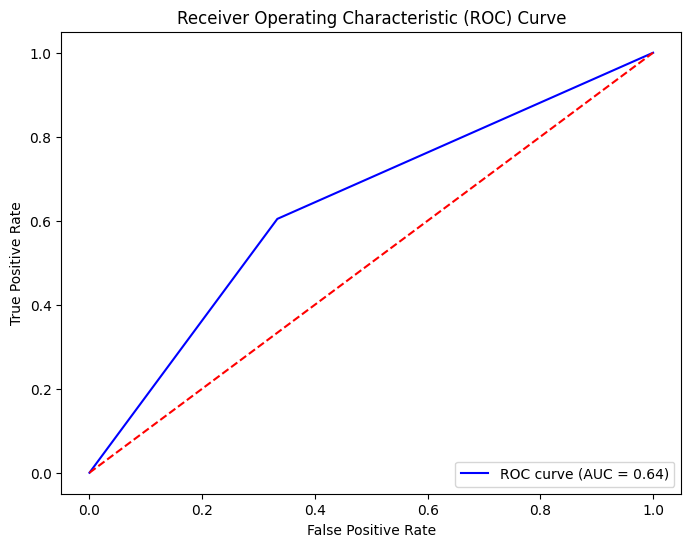

In [ ]:
# plotando o gráfico ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

O modelo tem um desempenho razoável, mas o AUC de 0,64 indica que ele não é muito eficaz em separar as classes. Há espaço para melhorias, como ajustar o limiar ou otimizar o modelo para aumentar a área sob a curva.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A) Regressão logística é um método estatístico que prevejo a probabilidade de um evento ocorrer, como se um paciente tem ou não uma doença. Ele usa a função sigmoide para transformar os resultados em valores entre 0 e 1

B) A regressão logística é um modelo de classificação porque ela não prevê valores numéricos contínuos, mas sim categoriza os dados em classes (ex.: doente ou não doente) com base na probabilidade calculada, usando um limiar (geralmente 0,5) para decidir a classe.

C) A regressão logística tem em comum com a regressão linear o uso de uma equação linear (combinação de variáveis com coeficientes) para modelar os dados. Ambas também dependem de suposições como a linearidade das variáveis e usam otimização para ajustar os parâmetros.